C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of IoT Devices: 100
Number of Fog Nodes: 5
Max distance between fog nodes: 841.92 meters
Min distance between fog nodes: 352.16 meters
Average distance between fog nodes: 573.80 meters
✅ Latency requirement met. Fog node placement is efficient.


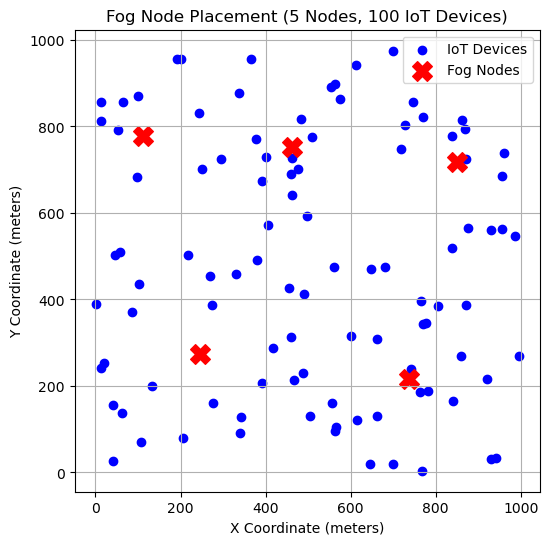

Optimal Fog Node Placements:
[[246.42307692 274.03846154]
 [850.5625     718.5       ]
 [111.         777.16666667]
 [462.36842105 753.52631579]
 [738.07407407 215.37037037]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_devices = 100  # Fixed number of IoT devices
num_fog_nodes = 5  # Fixed number of fog nodes
area_size = 1000  # 1km x 1km area in meters
max_latency = 10  # Latency must be < 10ms
speed_of_light = 200000  # km/s (fiber optics speed)
max_distance = (max_latency / 1000) * speed_of_light * 1000  # Convert to meters
max_fog_distance = min(1000, max_distance)  # Max 1km constraint

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_devices, 2))

# Apply K-Means Clustering with fixed fog nodes
kmeans = KMeans(n_clusters=num_fog_nodes, random_state=42, n_init=10)
kmeans.fit(iot_devices)
fog_nodes = kmeans.cluster_centers_

# Compute distances between fog nodes
distances = cdist(fog_nodes, fog_nodes)
np.fill_diagonal(distances, np.nan)  # Avoid self-distance
max_actual_distance = np.nanmax(distances)
min_actual_distance = np.nanmin(distances)
avg_actual_distance = np.nanmean(distances)

# Print efficiency and recommendations
print(f"Number of IoT Devices: {num_devices}")
print(f"Number of Fog Nodes: {num_fog_nodes}")
print(f"Max distance between fog nodes: {max_actual_distance:.2f} meters")
print(f"Min distance between fog nodes: {min_actual_distance:.2f} meters")
print(f"Average distance between fog nodes: {avg_actual_distance:.2f} meters")

if max_actual_distance <= max_fog_distance:
    print("✅ Latency requirement met. Fog node placement is efficient.")
else:
    print("⚠️ Latency exceeded! Consider increasing the number of fog nodes.")

# Plotting the results
plt.figure(figsize=(6, 6))
plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices')
plt.scatter(fog_nodes[:, 0], fog_nodes[:, 1], c='red', marker='X', s=200, label='Fog Nodes')
plt.xlabel("X Coordinate (meters)")
plt.ylabel("Y Coordinate (meters)")
plt.title("Fog Node Placement (5 Nodes, 100 IoT Devices)")
plt.legend()
plt.grid()
plt.show()

# Print final fog node coordinates
print("Optimal Fog Node Placements:")
print(fog_nodes)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


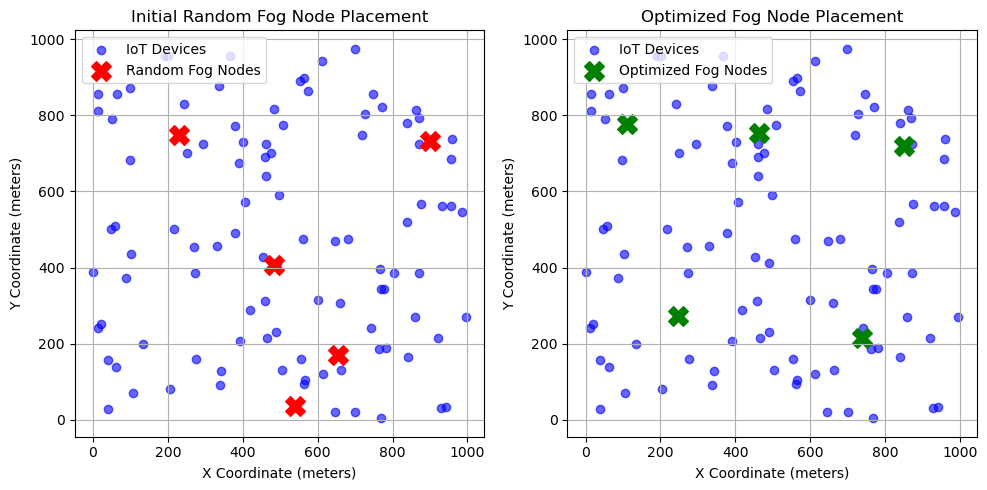

📍 Initial Random Fog Node Positions:
 [[899 733]
 [484 406]
 [230 748]
 [654 170]
 [540  35]]

✅ Optimized Fog Node Positions:
 [[246.42307692 274.03846154]
 [850.5625     718.5       ]
 [111.         777.16666667]
 [462.36842105 753.52631579]
 [738.07407407 215.37037037]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for consistency
np.random.seed(42)

# Parameters
num_iot_devices = 100
area_size = 1000  # 1 km² (1000m x 1000m)
num_fog_nodes = 5  # Initial random placement

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Generate initial random fog node locations
random_fog_nodes = np.random.randint(0, area_size, size=(num_fog_nodes, 2))

# K-Means Optimization for Fog Placement
kmeans = KMeans(n_clusters=num_fog_nodes, random_state=42, n_init=10)
kmeans.fit(iot_devices)
optimized_fog_nodes = kmeans.cluster_centers_

# Function to plot placements
def plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes):
    plt.figure(figsize=(10, 5))

    # Subplot 1: Initial Random Fog Placement
    plt.subplot(1, 2, 1)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(random_fog_nodes[:, 0], random_fog_nodes[:, 1], c='red', marker='X', s=200, label='Random Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Initial Random Fog Node Placement")
    plt.legend()
    plt.grid()

    # Subplot 2: Optimized Fog Placement
    plt.subplot(1, 2, 2)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(optimized_fog_nodes[:, 0], optimized_fog_nodes[:, 1], c='green', marker='X', s=200, label='Optimized Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Optimized Fog Node Placement")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes)

# Print positions of fog nodes
print("📍 Initial Random Fog Node Positions:\n", random_fog_nodes)
print("\n✅ Optimized Fog Node Positions:\n", optimized_fog_nodes)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


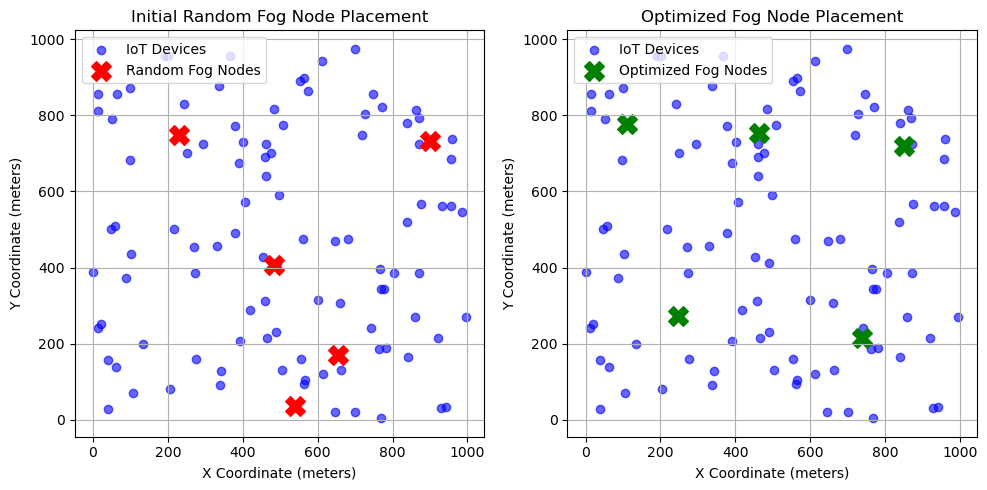

📍 Initial Random Fog Node Positions:
 [[899 733]
 [484 406]
 [230 748]
 [654 170]
 [540  35]]

✅ Optimized Fog Node Positions:
 [[246.42307692 274.03846154]
 [850.5625     718.5       ]
 [111.         777.16666667]
 [462.36842105 753.52631579]
 [738.07407407 215.37037037]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for consistency
np.random.seed(42)

# Parameters
num_iot_devices = 100
area_size = 1000  # 1 km² (1000m x 1000m)
num_fog_nodes = 5  # Initial random placement

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Generate initial random fog node locations
random_fog_nodes = np.random.randint(0, area_size, size=(num_fog_nodes, 2))

# K-Means Optimization for Fog Placement
kmeans = KMeans(n_clusters=num_fog_nodes, random_state=42, n_init=10)
kmeans.fit(iot_devices)
optimized_fog_nodes = kmeans.cluster_centers_

# Function to plot placements
def plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes):
    plt.figure(figsize=(10, 5))

    # Subplot 1: Initial Random Fog Placement
    plt.subplot(1, 2, 1)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(random_fog_nodes[:, 0], random_fog_nodes[:, 1], c='red', marker='X', s=200, label='Random Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Initial Random Fog Node Placement")
    plt.legend()
    plt.grid()

    # Subplot 2: Optimized Fog Placement
    plt.subplot(1, 2, 2)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(optimized_fog_nodes[:, 0], optimized_fog_nodes[:, 1], c='green', marker='X', s=200, label='Optimized Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Optimized Fog Node Placement")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes)

# Print positions of fog nodes
print("📍 Initial Random Fog Node Positions:\n", random_fog_nodes)
print("\n✅ Optimized Fog Node Positions:\n", optimized_fog_nodes)


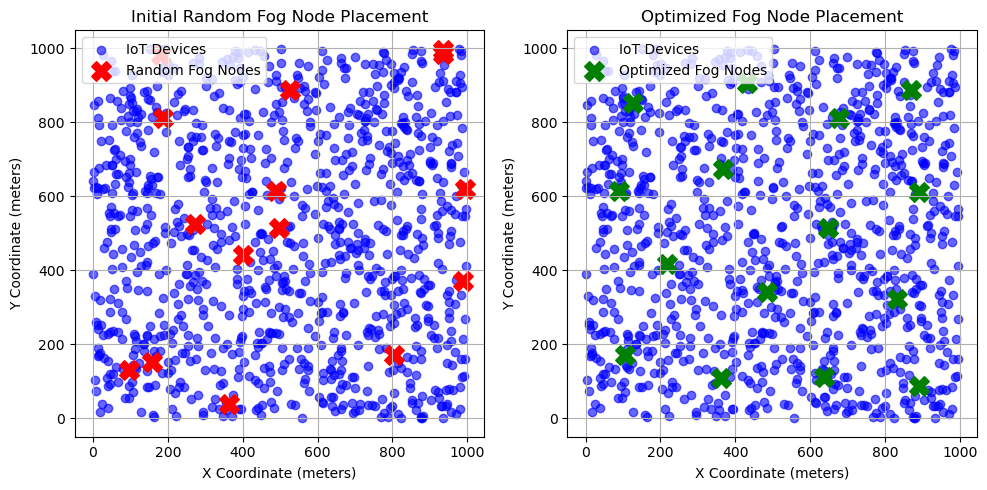

📍 Initial Random Fog Node Positions:
 [[989 371]
 [934 994]
 [401 442]
 [489 614]
 [272 525]
 [158 151]
 [994 619]
 [187 812]
 [ 97 130]
 [804 170]
 [935 985]
 [182 982]
 [363  38]
 [526 887]
 [496 515]]

✅ Optimized Fog Node Positions:
 [[637.11290323 110.14516129]
 [367.5        673.84848485]
 [832.84       323.37333333]
 [361.640625   109.515625  ]
 [105.4939759  170.1686747 ]
 [218.02985075 417.11940299]
 [870.55882353 886.98529412]
 [891.1         88.08333333]
 [ 89.28571429 612.77777778]
 [648.2238806  515.25373134]
 [432.09090909 906.36363636]
 [128.03225806 852.88709677]
 [485.25       340.19117647]
 [678.27142857 811.38571429]
 [890.72857143 611.95714286]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for consistency
np.random.seed(42)

# Parameters
num_iot_devices = 1000
area_size = 1000  # 1 km² (1000m x 1000m)
num_fog_nodes = 15  # Initial random placement

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Generate initial random fog node locations
random_fog_nodes = np.random.randint(0, area_size, size=(num_fog_nodes, 2))

# K-Means Optimization for Fog Placement
kmeans = KMeans(n_clusters=num_fog_nodes, random_state=42, n_init=10)
kmeans.fit(iot_devices)
optimized_fog_nodes = kmeans.cluster_centers_

# Function to plot placements
def plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes):
    plt.figure(figsize=(10, 5))

    # Subplot 1: Initial Random Fog Placement
    plt.subplot(1, 2, 1)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(random_fog_nodes[:, 0], random_fog_nodes[:, 1], c='red', marker='X', s=200, label='Random Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Initial Random Fog Node Placement")
    plt.legend()
    plt.grid()

    # Subplot 2: Optimized Fog Placement
    plt.subplot(1, 2, 2)
    plt.scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    plt.scatter(optimized_fog_nodes[:, 0], optimized_fog_nodes[:, 1], c='green', marker='X', s=200, label='Optimized Fog Nodes')
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    plt.title("Optimized Fog Node Placement")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_fog_placement(iot_devices, random_fog_nodes, optimized_fog_nodes)

# Print positions of fog nodes
print("📍 Initial Random Fog Node Positions:\n", random_fog_nodes)
print("\n✅ Optimized Fog Node Positions:\n", optimized_fog_nodes)
